In [1]:
import pandas as pd
import numpy as np

In [4]:

data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
!curl $data > AB_NYC_2019.csv

curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6912k  100 6912k    0     0  43.5M      0 --:--:-- --:--:-- --:--:-- 43.5M


In [6]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-20 07:53:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.1’

AB_NYC_2019.csv.1   100%[===================>]   6.75M  --.-KB/s    in 0.07s   

2021-09-20 07:53:57 (101 MB/s) - ‘AB_NYC_2019.csv.1’ saved [7077973/7077973]



In [11]:
df = pd.read_csv('AB_NYC_2019.csv')

In [12]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [13]:
df.price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='price', ylabel='Count'>

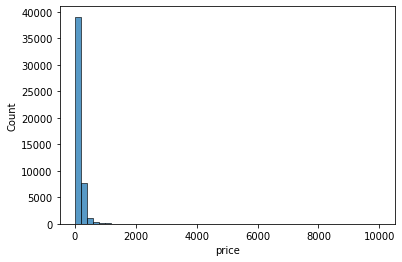

In [15]:
sns.histplot(df.price, bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

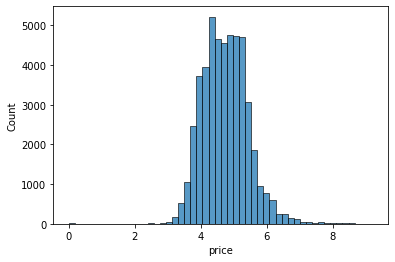

In [16]:

sns.histplot(np.log1p(df.price), bins=50)

In [17]:
df_2 = df[["latitude", 
           "longitude", 
           "price", 
           "minimum_nights", 
           "number_of_reviews", 
           "reviews_per_month", 
           "calculated_host_listings_count",
           "availability_365"  ]]

In [18]:
df_2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


**Home Work Questions**

**Question 1:**

In [19]:

df_2.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Question 2:**

In [20]:
df_2.minimum_nights.median()

3.0

In [21]:
n = len(df_2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train      = df_2.iloc[idx[:n_train]]
df_val        = df_2.iloc[idx[n_train:n_train+n_val]]
df_test       = df_2.iloc[idx[n_train+n_val:]]
df_train_test = df_2.iloc[idx[:n_train+n_test]]

y_train = np.log1p(df_train.price)
y_val   = np.log1p(df_val.price)
y_test  = np.log1p(df_test.price)

del df_train['price']
del df_val['price']
del df_test['price']

In [22]:
len(y_train)

29337

**Question 3:**

In [23]:
def X_zero_prepare(df):
    df = df.copy()
    
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
    X = df.values

    return X

In [24]:

X_train_zero = X_zero_prepare(df_train)
X_val_zero   = X_zero_prepare(df_val)

In [25]:
def X_mean_prepare(df):
    df = df.copy()
    mean_value = df['reviews_per_month'].mean()
    df['reviews_per_month'] = df['reviews_per_month'].fillna(mean_value)
    X = df.values

    return X

In [26]:

X_train_mean = X_mean_prepare(df_train)
X_val_mean   = X_mean_prepare(df_val)

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [28]:
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

In [29]:
X_val_zero = X_zero_prepare(df_val)
X_val_mean = X_mean_prepare(df_val)

In [30]:
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

In [31]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_val, y_pred_zero)
rmse(y_val, y_pred_mean)
print(rmse(y_val, y_pred_zero))
print(rmse(y_val, y_pred_mean))

0.6430337788500519
0.6427535847501354


In [32]:
score_zero = rmse(y_val, y_pred_zero)
round(score_zero, 2)
print(round(score_zero, 2))

0.64


In [33]:

score_mean = rmse(y_val, y_pred_mean)
round(score_mean, 2)
print(round(score_mean, 2))

0.64


**Question 4:**

In [35]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

prepare_X =  X_zero_prepare
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    score = round(score, 2)
    
    
    print(r, w0, score)

0.0 -419.9126587294167 0.64
1e-05 -419.4137637716231 0.64
0.0001 -414.97649243207684 0.64
0.001 -375.2736527030572 0.64
0.1 -32.56256055226638 0.68
1 -3.499216837729211 0.68
10 -0.35127675916757617 0.68


**Question 5:**

In [36]:
errors = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train      = df_2.iloc[idx[:n_train]]
    df_val        = df_2.iloc[idx[n_train:n_train+n_val]]

    y_train = np.log1p(df_train.price)
    y_val   = np.log1p(df_val.price)

    del df_train['price']
    del df_val['price']
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    errors.append(score)
np.std(errors)

print(round(np.std(errors), 3))

0.008


**Question 6:**

In [40]:
    n = len(df_2)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)

    np.random.seed(9)
    np.random.shuffle(idx)

    df_train      = df_2.iloc[idx[:n_train]]
    df_val        = df_2.iloc[idx[n_train:n_train+n_val]]
    df_test       = df_2.iloc[idx[n_train+n_val:]]

    df_combo = df_2.iloc[idx[:n_train+n_val]]

    y_train = np.log1p(df_train.price)
    y_val   = np.log1p(df_val.price)
    y_test  = np.log1p(df_test.price)

    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    prepare_X = X_zero_prepare
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    score = round(score, 2)
    
    
    print(r, w0, score)

10 -193.96323221220518 0.65
